In [1]:
import numpy as np      
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv('noise_removed')

In [3]:
db = db.dropna()

In [4]:
print(db.shape)

(5201, 33)


In [5]:
db['Exit'].unique

<bound method Series.unique of 0        5
1        5
2        5
3        1
4        5
        ..
19485    1
19498    1
19503    1
19512    1
19516    1
Name: Exit, Length: 5201, dtype: int64>

In [6]:
import random
total_data_points = db.shape[0]
random_sample_size = 500
random_indices = random.sample(range(total_data_points), random_sample_size)

test_data = db.iloc[random_indices]
db.reset_index(drop=True, inplace=True)

db = db.drop(index=random_indices)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X = db.drop('Exit', axis=1)  
y = db['Exit']
x_test = test_data
sc = MinMaxScaler()
X =  sc.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
X = db.drop('Exit', axis=1)  
y = db['Exit']
x_test = test_data
sc = MinMaxScaler()
X =  sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the test data :", x_test.shape)

Shape of the X Train : (3760, 32)
Shape of the y Train : (3760,)
Shape of the X test : (941, 32)
Shape of the y test : (941,)
Shape of the test data : (500, 33)


Training Accuracy : 0.7345744680851064
Testing Accuracy : 0.7587672688629118


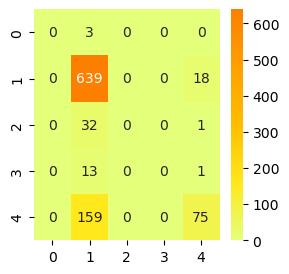

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.76      0.97      0.85       657
           2       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        14
           5       0.79      0.32      0.46       234

    accuracy                           0.76       941
   macro avg       0.31      0.26      0.26       941
weighted avg       0.72      0.76      0.71       941

Micro-average F1-score: 0.7587672688629118
Macro-average F1-score: 0.2612452905738675


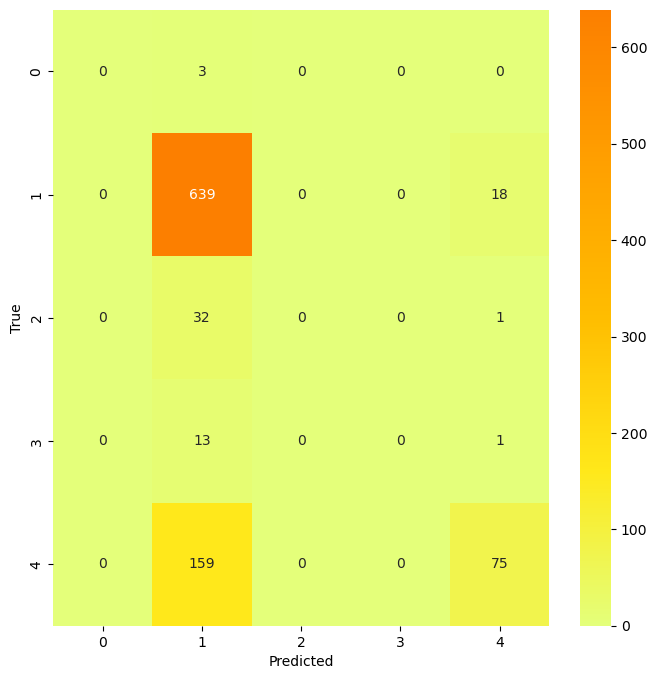

In [12]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
warnings.filterwarnings("ignore")
rf = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=100, min_samples_split=20,
                       n_estimators=100,criterion='entropy',n_jobs=1000,max_leaf_nodes=100,max_features='auto'
                           )

    
rf.fit(X,y)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

from sklearn.metrics import f1_score

# Calculate micro and macro-average F1-scores
micro_f1 = f1_score(y_test, y_pred_rf, average='micro')
macro_f1 = f1_score(y_test, y_pred_rf, average='macro')

print("Micro-average F1-score:", micro_f1)
print("Macro-average F1-score:", macro_f1)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot=True, cmap='Wistia', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

warnings.resetwarnings()

In [13]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [14]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y))))

def rmsle_cv(model):
    rmse = make_scorer(rmsle, greater_is_better=False)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse)
    return -scores

In [15]:
from sklearn.metrics import r2_score

def calculate_r2_scores(models, X, y):
    r2_scores = []
    for model in models:
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        r2_scores.append(r2)
    return r2_scores

In [16]:
lasso = Lasso(alpha =0.0005, random_state=0)
elasticNet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)
kernelRidge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)
gradientBoosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)
randomForest = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=0)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
scores = rmsle_cv(lasso)
print("Lasso:: Mean:", scores.mean(), " Std:", scores.std())
lasso_model = lasso.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_train)
rmsle_train = rmsle(y_train, y_pred_lasso)
r2_train = r2_score(y_train, y_pred_lasso)
print("RMSLE on training predictions:", rmsle_train,  "R^2:", r2_train)

Lasso:: Mean: 0.4903495706759905  Std: 0.0036832394868373066
RMSLE on training predictions: 0.4898227742991063 R^2: 0.07453771760238148


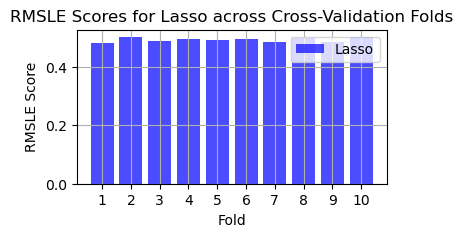

Lasso:: Mean: 0.49154504695904333  Std: 0.006514299084561976
RMSLE on the training data: 0.4908282457558349


In [26]:
import matplotlib.pyplot as plt
lasso = Lasso(alpha=0.1)

scores = cross_val_score(lasso, X_train, y_train, cv=10, scoring=make_scorer(rmsle))

lasso_mean = scores.mean()
lasso_std = scores.std()

plt.figure(figsize=(4, 2))
plt.bar(range(1, 11), scores, color='blue', alpha=0.7, label='Lasso')
plt.xlabel('Fold')
plt.ylabel('RMSLE Score')
plt.title('RMSLE Scores for Lasso across Cross-Validation Folds')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

print("Lasso:: Mean:", lasso_mean, " Std:", lasso_std)
print("RMSLE on the training data:", rmsle_train)


In [30]:
score = rmsle_cv(elasticNet)
print("ElasticNet:: Mean:", score.mean(), " Std:", score.std())
scores = {}
scores['elasticNet'] = (score.mean(), score.std())
elasticNet_model = elasticNet.fit(X_train, y_train)
y_pred_elasticNet = elasticNet_model.predict(X_train)
train_rmsle = rmsle(y_train, y_pred_elasticNet)
r2_train = r2_score(y_train, y_pred_elasticNet)
print("RMSLE on Training Set:", train_rmsle, "R^2:", r2_train)

AttributeError: 'NoneType' object has no attribute 'mean'

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already defined the ElasticNet model (elasticNet), X_train, and y_train

# Perform cross-validation and store the scores
scores = rmsle_cv(elasticNet)

if scores is not None:
    # Calculate the mean and standard deviation of the ElasticNet RMSLE scores
    elasticNet_mean = scores.mean()
    elasticNet_std = scores.std()

    # Plot the ElasticNet RMSLE scores
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(scores) + 1), scores, color='green', alpha=0.7, label='ElasticNet')
    plt.xlabel('Fold')
    plt.ylabel('RMSLE Score')
    plt.title('RMSLE Scores for ElasticNet across Cross-Validation Folds')
    plt.xticks(range(1, len(scores) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    print("ElasticNet:: Mean:", elasticNet_mean, " Std:", elasticNet_std)
    scores['elasticNet'] = (elasticNet_mean, elasticNet_std)

    elasticNet_model = elasticNet.fit(X_train, y_train)
    y_pred_elasticNet = elasticNet_model.predict(X_train)
    train_rmsle = rmsle(y_train, y_pred_elasticNet)
else:
    print("Cross-validation returned None. Check your rmsle_cv function.")


Cross-validation returned None. Check your rmsle_cv function.


In [19]:
warnings.filterwarnings("ignore")
score = rmsle_cv(kernelRidge)
print("KernelRidge:: Mean:",score.mean(), " Std:", score.std())
scores['kernelRidge'] = (score.mean(), score.std())
kernelRidge_model = kernelRidge.fit(X_train, y_train)
y_pred_kernelRidge = kernelRidge_model.predict(X_train)
s = rmsle(y_train,y_pred_kernelRidge)
r2_train = r2_score(y_train, y_pred_kernelRidge)
print("RMSLE:", s , "R^2:", r2_train)
warnings.resetwarnings()

KernelRidge:: Mean: 0.4769000953401167  Std: 0.0044201673061019684
RMSLE: 0.46956513374188086 R^2: 0.14906685404469155


In [20]:
score = rmsle_cv(svr)
print("SVR:: Mean:",score.mean(), " Std:", score.std())
scores['svr'] = (score.mean(), score.std())
svr_model = svr.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_train)
s2 = rmsle(y_train,y_pred_svr)
r2_train = r2_score(y_train, y_pred_svr)
print("RMSLE:", s2, "R^2:", r2_train)

SVR:: Mean: 0.5861359674410448  Std: 0.011048639264073831
RMSLE: 0.5861842500299206 R^2: -0.4174336079354668


In [21]:
score = rmsle_cv(gradientBoosting)
print("GradientBoostingRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['gradientBoosting'] = (score.mean(), score.std())
gradientBoosting_model = gradientBoosting.fit(X_train, y_train)
y_pred_gradientBoosting = gradientBoosting_model.predict(X_train)
s3 = rmsle(y_train,y_pred_gradientBoosting)
r2_train = r2_score(y_train, y_pred_gradientBoosting)
print("RMSLE:", s3, "R^2:", r2_train)

GradientBoostingRegressor:: Mean: 0.43235099734324417  Std: 0.00836589497719381
RMSLE: 0.2435244929811261 R^2: 0.7742421566586777


In [27]:

score = rmsle_cv(xgb)
print("XGBRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['xgb'] = (score.mean(), score.std())
xgb_model = xgb.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_train)
s4 = rmsle(y_train,y_pred_xgb)
r2_train = r2_score(y_train, y_pred_xgb)
print("RMSLE:", s4, "R^2:", r2_train)

[11:32:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:32:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:32:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:32:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:32:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

XGBRegressor:: Mean: 0.4325174538137836  Std: 0.004708849777649588
[11:32:09] WARNING: /Users/runner

In [22]:
score = rmsle_cv(randomForest)
print("RandomForestRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['randomForest'] = (score.mean(), score.std())
randomForest_model = randomForest.fit(X_train, y_train)
y_pred_randomForest = randomForest_model.predict(X_train)
s5 = rmsle(y_train,y_pred_randomForest)
r2_train = r2_score(y_train, y_pred_randomForest)
print("RMSLE:", s5, "R^2:", r2_train)

RandomForestRegressor:: Mean: 0.42782543637572734  Std: 0.006239027185965879
RMSLE: 0.3113924471287875 R^2: 0.6291699553485436


In [28]:
def ensemble_models(X):
    return ((0.1 * lasso_model.predict(X)) +
            (0.1 * elasticNet_model.predict(X)) +
           (0.1 * kernelRidge_model.predict(X)) +
           (0.5 * gradientBoosting_model.predict(X)) + 
           (0.2 * xgb_model.predict(X)))

In [29]:
averaged_score = rmsle(y_train, ensemble_models(X_train))
scores['averaged'] = (averaged_score, 0)
print('RMSLE score on train data:', averaged_score)

RMSLE score on train data: 0.2903052408371031


In [97]:
r2_train = r2_score(y_train,ensemble_models(X_train))
r2_train

0.6569783617014651

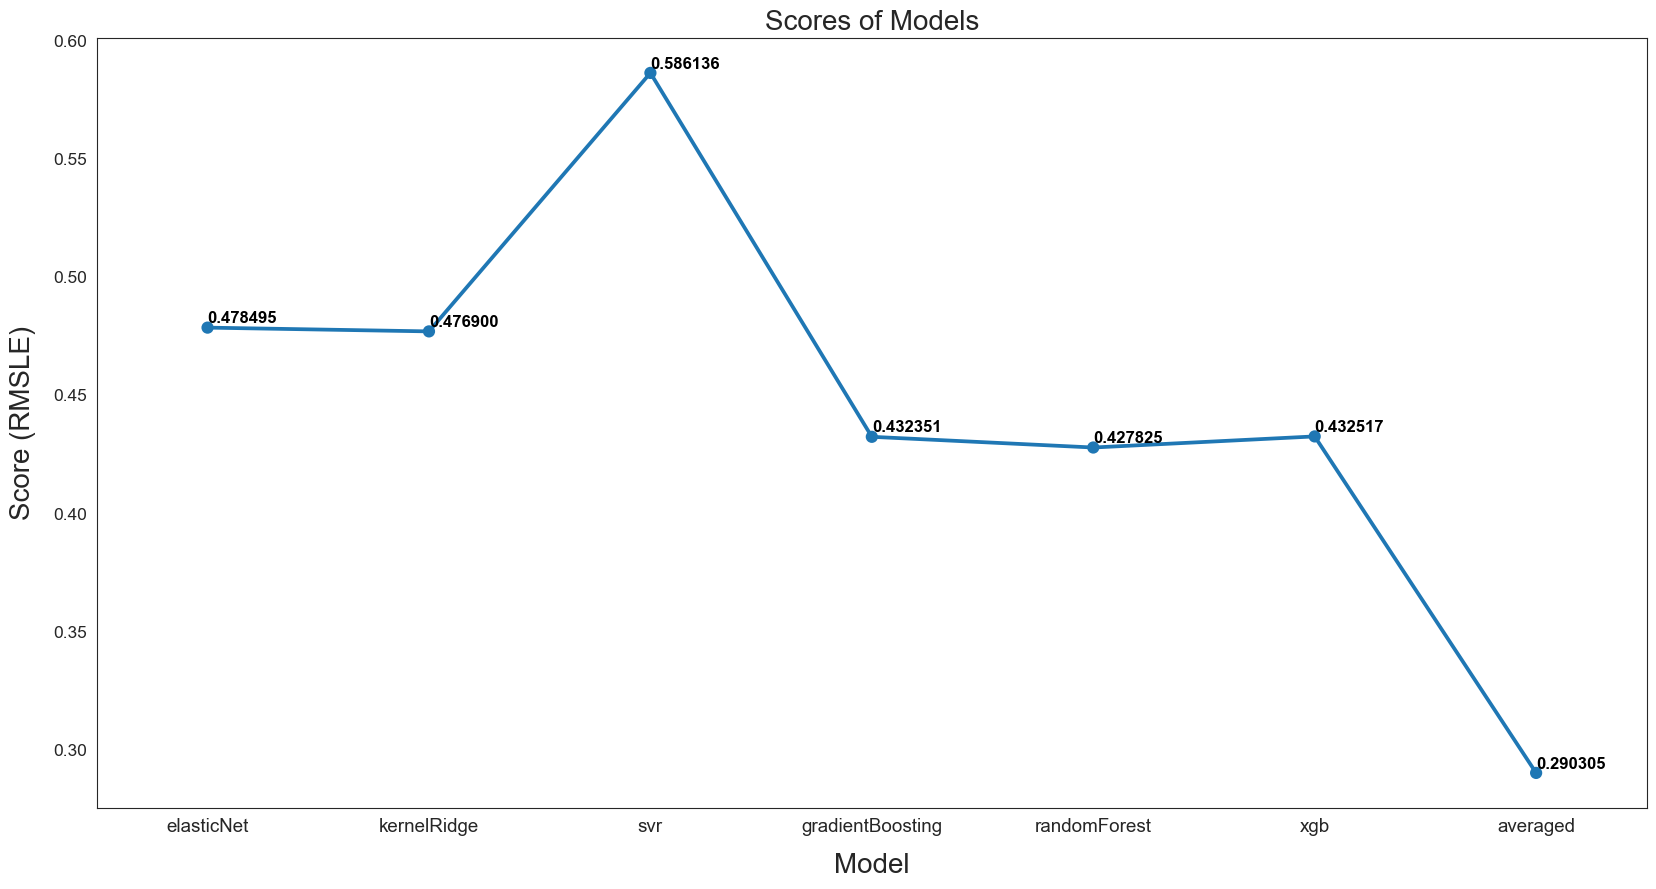

In [30]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 10))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSLE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)
plt.show()

In [107]:
def encode_to_bins(values, bins):
    encoded_values = [min(bins, key=lambda x: abs(x - value)) for value in values]
    return encoded_values


In [108]:
bins = [1, 2, 3, 4, 5]
test_predict = np.exp(ensemble_models(X_test))
tp = encode_to_bins(test_predict, bins)
print(tp[::5])

[5, 3, 3, 4, 5, 5, 5, 5, 3, 5, 3, 4, 5, 5, 2, 5, 5, 3, 4, 5, 4, 3, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 3, 2, 5, 5, 3, 3, 5, 3, 2, 5, 5, 4, 3, 5, 5, 4, 3, 5, 4, 4, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 3, 3, 3, 3, 3, 4, 5, 4, 3, 3, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 3, 5, 5, 5, 4, 4, 5, 4, 3, 3, 4, 5, 5, 2, 3, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 3, 3, 5, 3, 5, 2, 5, 3, 5, 5, 5, 2, 5, 5, 4, 5, 3, 3, 5, 5, 4, 4, 5, 2, 4, 5, 3, 5, 5, 5, 5, 3, 3, 5, 5, 5, 3, 3, 3, 5, 3, 4, 4, 5, 3, 5, 5, 5, 5, 5, 3, 3, 5, 3, 5, 5, 5, 5, 2, 3, 5, 2, 3]


In [109]:
def calculate_accuracy(y_test, pred_y_test):

    correct = 0
    total = len(y_test)

    for y_test, pred_y_test in zip(y_test, pred_y_test):
        if y_test == pred_y_test:
            correct += 1

    accuracy = correct / total
    return accuracy

calculate_accuracy(y_test, tp)

0.24335812964930925

In [80]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.63


In [82]:
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.2f}")

AdaBoost Accuracy: 0.21


In [83]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
y_train = label_encoder.fit_transform(y_train)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

XGBoost Accuracy: 0.63


In [85]:
lr = LogisticRegression()
voting_classifier = VotingClassifier(estimators=[('Random Forest', rf_classifier), ('AdaBoost', adaboost_classifier), ('XGBoost', xgb_classifier), ('Logistic Regression', lr)], voting='soft')
voting_classifier.fit(X_train, y_train)
voting_predictions = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Voting Classifier Accuracy: {voting_accuracy:.2f}")

Voting Classifier Accuracy: 0.64


/Users/deekshitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
bagged_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_classifier.fit(X_train, y_train)
bagged_predictions = bagged_classifier.predict(X_test)
bagged_accuracy = accuracy_score(y_test, bagged_predictions)
print(f"Bagged Decision Tree Accuracy: {bagged_accuracy:.2f}")

Bagged Decision Tree Accuracy: 0.62


In [87]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_classifier.fit(X_train, y_train)
extra_trees_predictions = extra_trees_classifier.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_predictions)
print(f"Extra Trees Accuracy: {extra_trees_accuracy:.2f}")

Extra Trees Accuracy: 0.61


In [88]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_classifier.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
print(f"Gradient Boosting Accuracy: {gradient_boosting_accuracy:.2f}")

Gradient Boosting Accuracy: 0.63


In [90]:
stacking_classifier = StackingClassifier(estimators=[('Random Forest', rf_classifier), ('XGBoost', xgb_classifier)], final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, y_train)
stacking_predictions = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}")

Stacking Classifier Accuracy: 0.63
